<a href="https://colab.research.google.com/github/nadundesilva/colab-notebooks/blob/main/notebooks/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from getpass import getpass
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
plt.rcParams["figure.figsize"] = (8, 6)   # Increase matplotlib figure size

In [ ]:
KAGGLE_DATA_DIR = "drive/MyDrive/Kaggle/Colab Notebooks/Datasets/mlcourse.ai"

## Load Data

In [3]:
try:
  %mkdir -p "$KAGGLE_DATA_DIR"
  %pushd "$KAGGLE_DATA_DIR"
  if len([x for x in os.listdir() if not x.startswith(".")]) == 0:
    os.environ['KAGGLE_USERNAME'] = input("Kaggle Username: ")
    os.environ['KAGGLE_KEY'] = getpass(prompt="Kaggle Key: ")

    !kaggle datasets download -d kashnitsky/mlcourse
    !unzip *.zip
    !rm *.zip
  else:
    print("Not downloading data set as it is already present in directory")
finally:
  %popd

def load_df(name: str):
  return pd.read_csv((os.path.join(KAGGLE_DATA_DIR, name)))

/content/drive/MyDrive/Kaggle/Colab Notebooks/Datasets/mlcourse.ai
Kaggle Username: nadundesilva
Kaggle Key: ··········
 65% 33.0M/51.1M [00:00<00:00, 31.4MB/s]
100% 51.1M/51.1M [00:00<00:00, 58.4MB/s]
Archive:  mlcourse.zip
  inflating: accidental-deaths-in-usa-monthly.csv  
  inflating: ads.csv                 
  inflating: ads_hour.csv            
  inflating: adult.data.csv          
  inflating: adult_test.csv          
  inflating: adult_train.csv         
  inflating: affairs.csv             
  inflating: beauty.csv              
  inflating: credit_scoring_sample.csv  
  inflating: currency.csv            
  inflating: flight_delays_test.csv  
  inflating: flight_delays_train.csv  
  inflating: hostel_factors.csv      
  inflating: medium_posts.csv        
  inflating: microchip_tests.txt     
  inflating: mlbootcamp5_train.csv   
  inflating: samsung_test.txt        
  inflating: samsung_test_labels.txt  
  inflating: samsung_train.txt       
  inflating: samsung_train_labels.

## Pandas Data Analysis

### Load Data Frame

In [4]:
df = load_df("beauty.csv")

In [5]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


### Exploration

In [6]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [7]:
df["wage"].head()

0     5.73
1     4.28
2     7.96
3    11.57
4    11.42
Name: wage, dtype: float64

In [8]:
df.shape

(1260, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [10]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff74d47c190>,
      dtype=object)

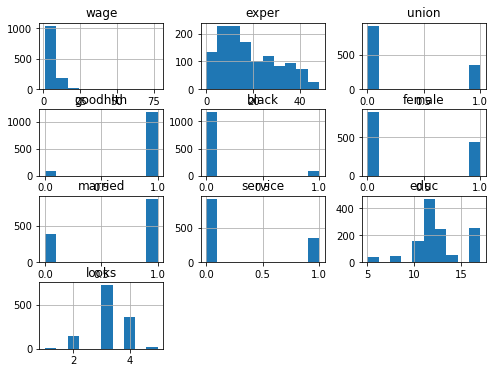

In [11]:
df.hist()

In [12]:
df["goodhlth"].value_counts(normalize=True)

1    0.933333
0    0.066667
Name: goodhlth, dtype: float64

### Indexing

In [13]:
df.iloc[0, 5]     # Get data item from row 0 column 5

1

In [14]:
df.iloc[:3, 5:7]  # Slices

,female,married
0,1,1
1,1,1
2,1,0


In [15]:
toy_df = pd.DataFrame({"age": [17, 32, 56], "salary": [56, 69, 120]},
             index=["Kate", "Leo", "Max"])

In [16]:
toy_df.loc[["Leo", "Max"], "age"]

Leo    32
Max    56
Name: age, dtype: int64

In [17]:
toy_df.loc[["Leo", "Max"], ["age","salary"]]

,age,salary
Leo,32,69
Max,56,120


In [18]:
df[df["wage"] > 40]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4
602,77.72,9,1,1,1,1,1,1,13,4


In [19]:
df[(df["wage"] > 10) & (df["female"] == 1)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
18,10.44,10,0,1,0,1,0,0,17,4
85,10.12,40,0,1,1,1,0,1,10,3
149,10.62,18,1,1,0,1,1,1,17,3
152,12.12,35,1,0,0,1,0,1,17,3
184,10.22,26,0,1,0,1,0,1,17,3
334,10.53,18,0,1,0,1,1,1,16,3
546,10.12,18,0,1,0,1,0,1,13,3
602,77.72,9,1,1,1,1,1,1,13,4


In [20]:
df["female"].apply(lambda gender_id: "female" if gender_id == 1 else "male").head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [21]:
df["female"].map({0: "female", 1: "male"}).head()

0      male
1      male
2      male
3    female
4    female
Name: female, dtype: object

### Group By

In [22]:
df.loc[df["female"] == 0, "wage"].median()

6.41

In [23]:
df.loc[df["female"] == 1, "wage"].median()

3.75

In [24]:
for (gender_id, sub_df) in df.groupby("female"):
  print("Median wage for %s is %f" % ("men" if gender_id == 0 else "female", sub_df["wage"].median()))

Median wage for men is 6.410000
Median wage for female is 3.750000


In [25]:
df.groupby(["female", "married"])["wage"].median()

female  married
0       0          5.065
        1          6.710
1       0          3.890
        1          3.580
Name: wage, dtype: float64

In [26]:
pd.crosstab(df["female"], df["married"])

married,0,1
female,,
0,166,658
1,223,213


### Visualization

In [27]:
df["educ"].value_counts()

12    468
13    246
10    156
17    132
16    121
14     51
8      44
5      42
Name: educ, dtype: int64

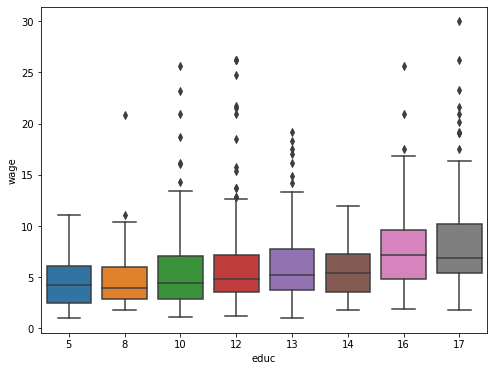

In [28]:
sns.boxplot(x="educ", y="wage", data= df[df["wage"] < 30])

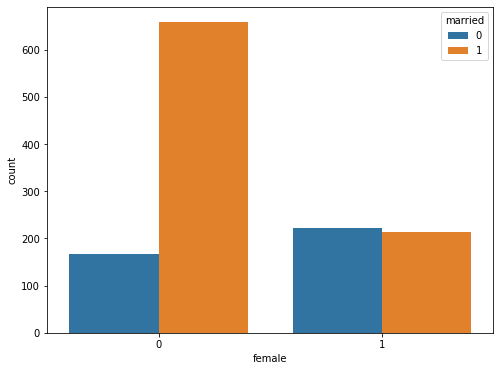

In [29]:
sns.countplot(x="female", hue="married", data=df)

In [30]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


## Visualization

### Load Data Frame

In [31]:
df = load_df("telecom_churn.csv")

In [32]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [33]:
df.shape

(3333, 20)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

### Whole Dataset Visualization

In [35]:
# Preprocesing for plots
df["International plan"] = df["International plan"].map({"Yes": 1, "No": 0})
df["Voice mail plan"] = df["Voice mail plan"].map({"Yes": 1, "No": 0})
df["Churn"] = df["Churn"].astype("int")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff746f81e10>,
      dtype=object)

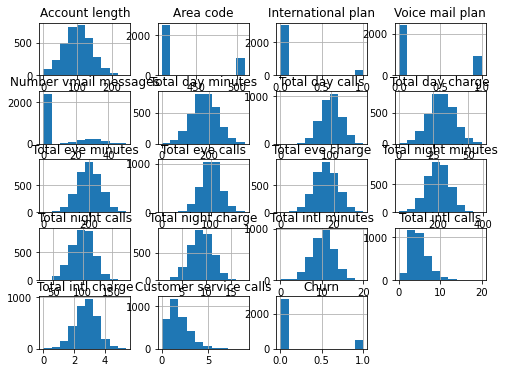

In [36]:
df.drop(["State"], axis=1).hist()

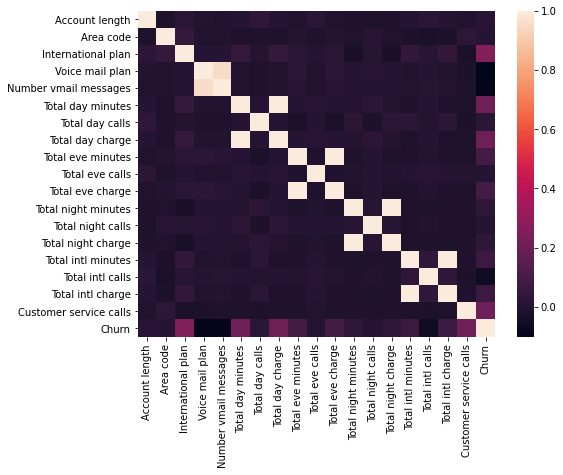

In [37]:
sns.heatmap(df.corr())

In [38]:
# Dropping charge columns since they are proportional to minutes
charge_coulmns = [f for f in df.columns if "charge" in f]
print("Dropping " + str(len(charge_coulmns)), " columns: " + ", ".join(["\"" + f + "\"" for f in charge_coulmns]))
df.drop(charge_coulmns, inplace=True, axis=1)
df.head()

Dropping 4  columns: "Total day charge", "Total eve charge", "Total night charge", "Total intl charge"


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [39]:
print("Generating TSNE representation\n")

# Normalize Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(["State"], axis=1))

# Build TSNE representation
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(df_scaled)

print(tsne_repr)

Generating TSNE representation

[[ -5.7980504 -56.409996 ]
 [  3.2440925 -53.617275 ]
 [  8.53847    48.070396 ]
 ...
 [ 37.02343     7.5396676]
 [-21.486658  -22.410524 ]
 [ -2.789274  -54.78329  ]]


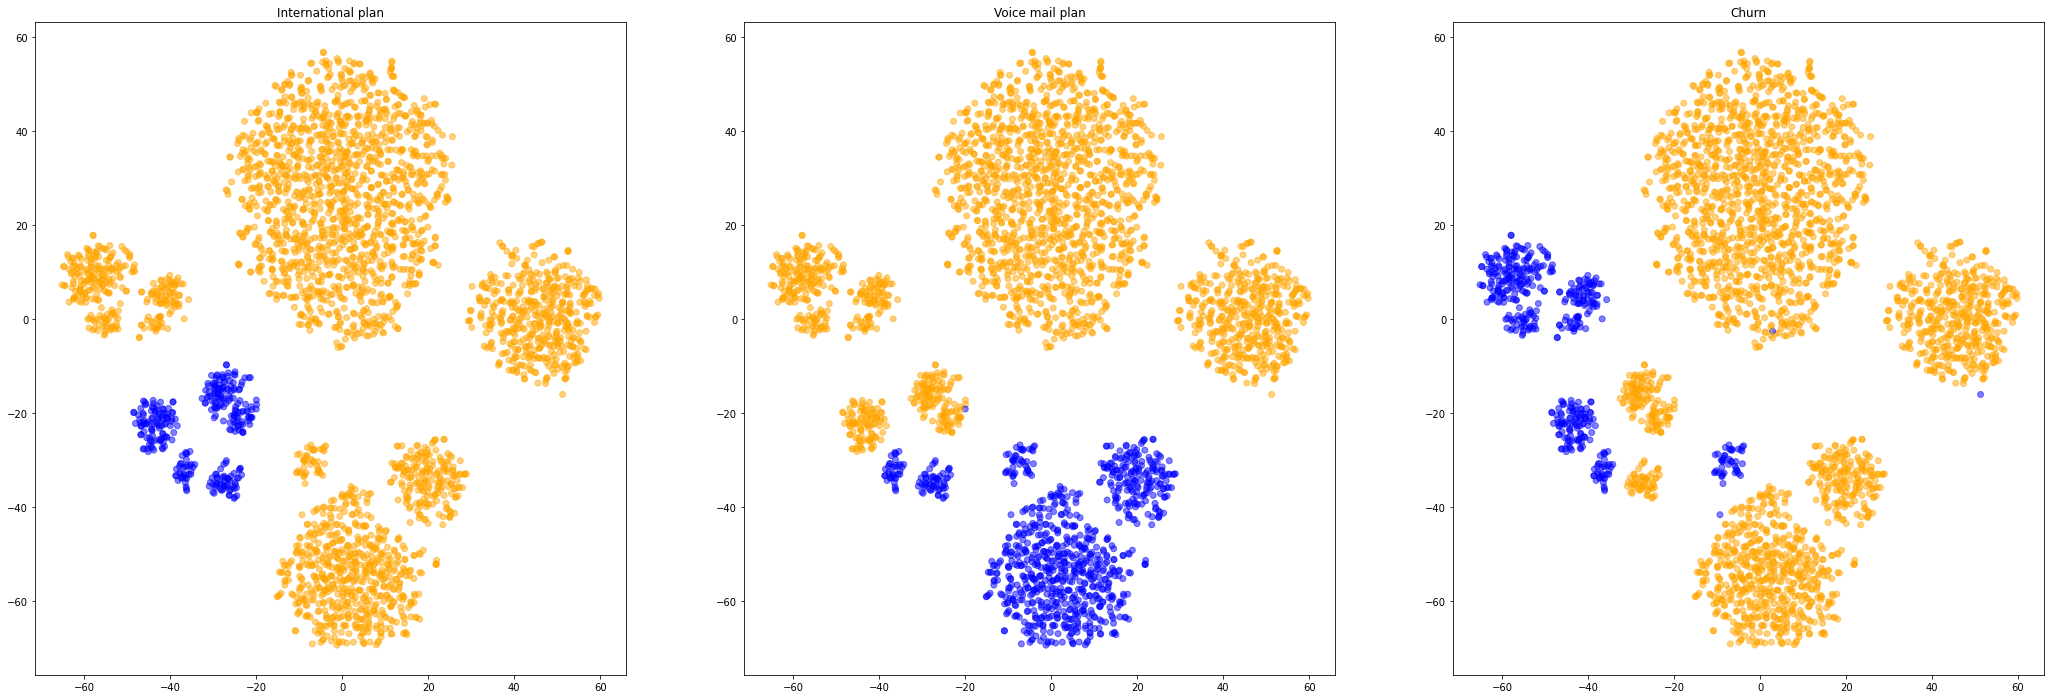

In [40]:
# Plot TSNE
_, axes = plt.subplots(1, 3, figsize=(36, 12))
for i, name in enumerate(["International plan", "Voice mail plan", "Churn"]):
  axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1],
              c=df[name].map({False: "orange", True: "blue"}),
              alpha=.5);
  axes[i].set_title(name);

### Single Feature Visualization

#### Numeric Features

In [41]:
df["Total day minutes"].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

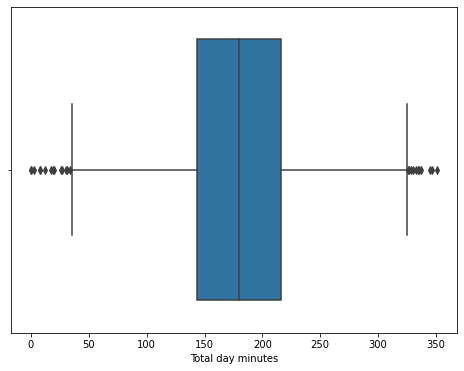

In [42]:
sns.boxplot(x="Total day minutes", data=df)

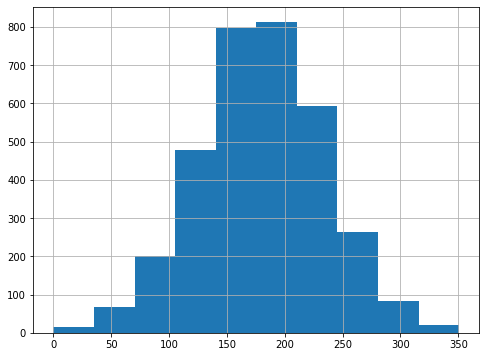

In [43]:
df["Total day minutes"].hist()

#### Categorical

In [44]:
df["State"].nunique()

51

In [45]:
df["State"].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
VA     77
WY     77
CT     74
ID     73
MI     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NJ     68
NC     68
MT     68
NV     66
CO     66
WA     66
MA     65
RI     65
MS     65
AZ     64
MO     63
FL     63
ND     62
ME     62
NM     62
OK     61
DE     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [46]:
df["Churn"].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

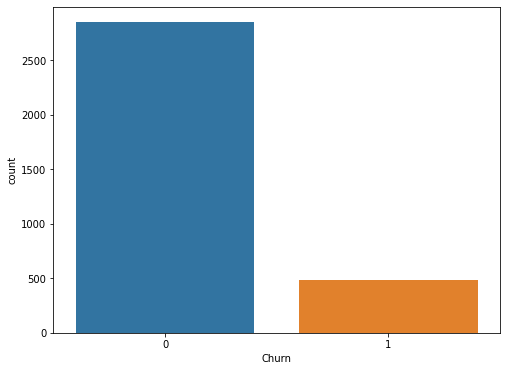

In [47]:
sns.countplot(x="Churn", data=df)

### Interaction between Features

#### Numeric - Numeric Interaction

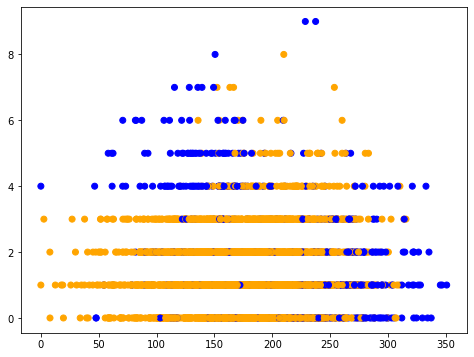

In [48]:
plt.scatter(df["Total day minutes"], df["Customer service calls"], c=df["Churn"].map({False: "orange", True: "blue"}))

In [49]:
df.drop("State", axis = 1).corrwith(df["Total day minutes"])

Account length            0.006216
Area code                -0.008264
International plan        0.049396
Voice mail plan          -0.001684
Number vmail messages     0.000778
Total day minutes         1.000000
Total day calls           0.006750
Total eve minutes         0.007043
Total eve calls           0.015769
Total night minutes       0.004323
Total night calls         0.022972
Total intl minutes       -0.010155
Total intl calls          0.008033
Customer service calls   -0.013423
Churn                     0.205151
dtype: float64

#### Categorical - Categorical Interaction

In [50]:
pd.crosstab(df["Churn"], df["Customer service calls"])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0
1,92,122,87,44,76,40,14,5,1,2


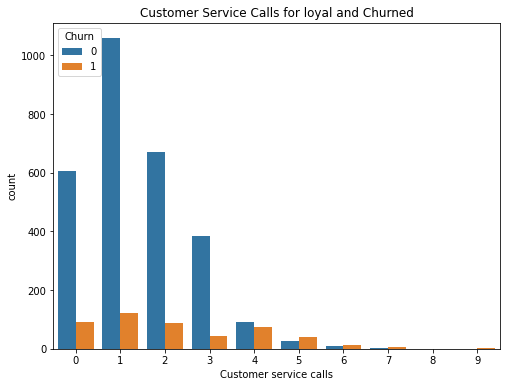

In [51]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);
plt.title("Customer Service Calls for loyal and Churned");

#### Categorical - Numerical Interaction

In [52]:
df.groupby("Churn")[["Total day minutes", "Customer service calls"]].min()

,Total day minutes,Customer service calls
Churn,,
0,0.0,0
1,0.0,0


In [53]:
df.groupby("Churn")[["Total day minutes", "Customer service calls"]].agg([np.median, np.std])

Total day minutes            Customer service calls          
                 median        std                 median       std
Churn                                                              
0                 177.2  50.181655                      1  1.163883
1                 217.6  68.997792                      2  1.853275

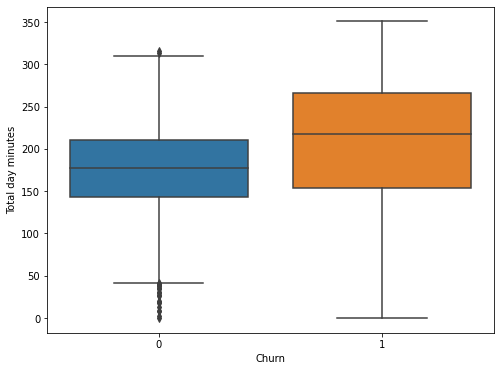

In [54]:
sns.boxplot(x="Churn", y="Total day minutes", data=df)